https://medium.com/nerd-for-tech/predicting-price-of-smart-phones-by-technical-specs-random-forest-logistic-regression-48ddc0cdeb0c

In [1]:
import pandas as pd
from pandas import json_normalize
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_json('datasets/evomag_2024_11_13.json')

In [3]:
def extract_smartphones(df):
    """
    Extract all products that have "Smartphone": "Da" in their specifications column.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing product information with a 'specifications' column
                          that contains dictionaries with product specs
    
    Returns:
    pandas.DataFrame: A new DataFrame containing only smartphone products
    """
    # Create a mask to filter products where specifications contains "Smartphone": "Da"
    smartphone_mask = df['specifications'].apply(
        lambda specs: isinstance(specs, dict) and specs.get('Smartphone') == 'Da'
    )
    
    # Apply the mask to get only smartphone products
    smartphones_df = df[smartphone_mask].copy()
    
    return smartphones_df

# Example usage:
# smartphones = extract_smartphones(df)
# print(f"Found {len(smartphones)} smartphones out of {len(df)} total products")


In [4]:
import pandas as pd
from pandas import json_normalize

def flatten_json_column(df, json_column):
    """
    Flatten a JSON column in a DataFrame so that the fields become separate columns.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame containing the JSON column to flatten
    json_column : str
        The name of the column containing the JSON data to flatten
        
    Returns:
    --------
    pandas.DataFrame
        A new DataFrame with the JSON column flattened into separate columns
    """
    # Create a copy to avoid modifying the original DataFrame
    result_df = df.copy()
    
    # Check if the JSON column exists in the DataFrame
    if json_column not in result_df.columns:
        raise ValueError(f"Column '{json_column}' not found in DataFrame")
    
    # Normalize the JSON column
    try:
        # Handle cases where some rows might have None/NaN values in the JSON column
        mask = result_df[json_column].notna()
        
        if mask.any():
            # Apply json_normalize only to rows that have valid JSON
            normalized_df = json_normalize(result_df.loc[mask, json_column])
            
            # Drop the original JSON column from the result
            result_subset = result_df.loc[mask].drop(json_column, axis=1)
            
            # Combine the original DataFrame (minus the JSON column) with the normalized data
            flattened_subset = pd.concat([result_subset.reset_index(drop=True), 
                                          normalized_df.reset_index(drop=True)], 
                                         axis=1)
            
            # Merge back with rows that had None/NaN values
            if (~mask).any():
                result_df = pd.concat([flattened_subset, 
                                       result_df.loc[~mask]]).sort_index()
            else:
                result_df = flattened_subset
        
        return result_df
        
    except Exception as e:
        raise ValueError(f"Error flattening JSON column: {str(e)}")

Luam doar telefoanele

In [5]:
df_smartphone = extract_smartphones(df)

In [6]:
df_smartphone.head()
df_smartphone.to_csv('test.csv')

In [7]:
df_smartphone_normalised = flatten_json_column(df_smartphone, 'specifications')

In [8]:
df_smartphone_normalised.to_csv("test.csv")

In [9]:
df_smartphone_normalised.head()

,timestamp,name,price,rating,number_of_reviews,is_in_stoc,url,product_code,online_mag,manufacturer,...,Editie,Model Procesor,Tip incarcator,Rezistent la apa si praf,Frecventa (MHz),Ecran secundar,Versiunea terminalului,Blitz Camera Fata,DNLA,Limba utilizare
0,1976-05-31 17:19:00.029,"Telefon Mobil Motorola Moto G24, Procesor Octa...",439.99,0,0,1,https://www.evomag.ro/telefoane-tablete-acceso...,PB180003PL,evomag,Motorola,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1976-05-31 17:19:00.029,"Telefon Mobil Apple iPhone 16 Pro Max, LTPO Su...",7399.99,0,0,1,https://www.evomag.ro/telefoane-tablete-acceso...,4181235,evomag,Apple,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1976-05-31 17:19:00.029,"Telefon Mobil Samsung Galaxy A05s, Procesor Oc...",549.99,0,0,1,https://www.evomag.ro/telefoane-tablete-acceso...,SM-A057GZKUEUE,evomag,Samsung,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1976-05-31 17:19:00.029,"Telefon Mobil Xiaomi 13T Pro, Procesor Mediate...",2499.99,5,10,1,https://www.evomag.ro/telefoane-tablete-acceso...,4121640,evomag,Xiaomi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1976-05-31 17:19:00.029,"Telefon Mobil Apple iPhone 16 Pro Max, LTPO Su...",7499.99,0,0,1,https://www.evomag.ro/telefoane-tablete-acceso...,4181250,evomag,Apple,...,Natural Titanium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_smartphone_normalised.count().sort_values(axis=0).to_csv("count.csv")

In [11]:
X = df_smartphone_normalised
y = df_smartphone_normalised['price']

In [12]:
df_model_training = pd.DataFrame()
df_model_training['5G'] = df_smartphone_normalised['5G']
df_model_training['4G'] = df_smartphone_normalised['4G']

df_model_training[['resolution width', 'resolution height']] = df_smartphone_normalised['Rezolutie maxima (px)'].str.split(' x ', expand=True)

df_model_training['Diagonala'] = df_smartphone_normalised['Diagonala (inch)']
df_model_training['Numar nuclee'] = df_smartphone_normalised['Numar nuclee']
df_model_training['Memorie RAM'] = df_smartphone_normalised['Memorie RAM']
df_model_training['Incarcare Wireless'] = df_smartphone_normalised['Incarcare Wireless']
df_model_training['Capacitate Baterie'] = df_smartphone_normalised['Capacitate'] 
df_model_training['Dual SIM'] = df_smartphone_normalised['Dual SIM']
df_model_training['Manufacturer'] = df_smartphone_normalised['manufacturer']
df_model_training['price'] = df_smartphone_normalised['price']

df_model_training

,5G,4G,resolution width,resolution height,Diagonala,Numar nuclee,Memorie RAM,Incarcare Wireless,Capacitate Baterie,Dual SIM,Manufacturer,price
0,NaN,Da,1612,720,6.56,8 (Octa Core),4 GB,NaN,5000 mAh,Da,Motorola,439.99
1,Da,NaN,1320,2868,6.9,6 (Hexa-Core),NaN,Da,NaN,NaN,Apple,7399.99
2,NaN,Da,1080,2400,6.71,8 (Octa Core),4 GB,NaN,5000 mAh,Da,Samsung,549.99
3,Da,NaN,NaN,NaN,6.67,8 (Octa Core),12 GB,NaN,5000 mAh,Da,Xiaomi,2499.99
4,Da,NaN,1320,2868,6.9,6 (Hexa-Core),NaN,Da,NaN,NaN,Apple,7499.99
...,...,...,...,...,...,...,...,...,...,...,...,...
1473,NaN,Da,576,1156,6,8 (Octa Core),4 GB,NaN,6300 mAh,Da,Oukitel,647.99
1474,NaN,Da,576,1156,6,8 (Octa Core),4 GB,NaN,6300 mAh,Da,Oukitel,647.99
1475,NaN,Da,576,1280,6.52,8 (Octa Core),6 GB,NaN,10600 mAh,Da,Oukitel,1019.99
1476,NaN,Da,576,1280,6.52,8 (Octa Core),6 GB,NaN,10600 mAh,Da,Oukitel,1019.99


In [13]:
df_model_training['5G'].fillna(0, inplace=True)
df_model_training['5G'].replace('Da', 1, inplace=True)
df_model_training['5G'].replace('Nu', 0, inplace=True)


df_model_training['4G'].fillna(0, inplace=True)
df_model_training['4G'].replace('Da', 1, inplace=True)
df_model_training['4G'].replace('Nu', 0, inplace=True)


df_model_training['resolution width'] = pd.to_numeric(df_model_training['resolution width'], errors='coerce')
df_model_training['resolution height'] = pd.to_numeric(df_model_training['resolution height'], errors='coerce')

df_model_training['resolution height'].fillna(0, inplace=True)
df_model_training['resolution width'].fillna(0, inplace=True)

df_model_training['Diagonala'] = pd.to_numeric(df_model_training['Diagonala'], errors='coerce')
df_model_training['Diagonala'].fillna(0, inplace=True)

df_model_training['Numar nuclee'] = df_model_training['Numar nuclee'].str.split('(').str[0]
df_model_training['Numar nuclee'] = pd.to_numeric(df_model_training['Numar nuclee'], errors='coerce')
df_model_training['Numar nuclee'].fillna(0, inplace=True)

df_model_training['Memorie RAM'] = df_model_training['Memorie RAM'].str.split(' ').str[0]
df_model_training['Memorie RAM'] = pd.to_numeric(df_model_training['Memorie RAM'], errors='coerce')
df_model_training['Memorie RAM'].fillna(0, inplace=True)

df_model_training['Incarcare Wireless'].fillna(0, inplace=True)
df_model_training['Incarcare Wireless'].replace('Da', 1, inplace=True)
df_model_training['Incarcare Wireless'].replace('Nu', 0, inplace=True)


df_model_training['Capacitate Baterie'] = df_model_training['Capacitate Baterie'].str.split(' ').str[0]
df_model_training['Capacitate Baterie'] = pd.to_numeric(df_model_training['Capacitate Baterie'], errors='coerce')
df_model_training['Capacitate Baterie'].fillna(0, inplace=True)

df_model_training['Dual SIM'].fillna(0, inplace=True)
df_model_training['Dual SIM'].replace('Da', 1, inplace=True)
df_model_training['Dual SIM'].replace('Nu', 0, inplace=True)


manufacturers = df_model_training['Manufacturer'].unique()
manufacturer_mapping = {manufacturer: i for i, manufacturer in enumerate(sorted(manufacturers))}

# Apply the mapping to create a new encoded column
df_model_training['Manufacturer'] = df_model_training['Manufacturer'].map(manufacturer_mapping)


df_model_training

/run/user/1000/ipykernel_81040/4053304321.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model_training['5G'].fillna(0, inplace=True)
/run/user/1000/ipykernel_81040/4053304321.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model_training['5G'].replace('Da', 1, inplace=True)
/run/user

,5G,4G,resolution width,resolution height,Diagonala,Numar nuclee,Memorie RAM,Incarcare Wireless,Capacitate Baterie,Dual SIM,Manufacturer,price
0,0,1,1612.0,720.0,6.56,8.0,4.0,0,5000.0,1,19,439.99
1,1,0,1320.0,2868.0,6.90,6.0,0.0,1,0.0,0,2,7399.99
2,0,1,1080.0,2400.0,6.71,8.0,4.0,0,5000.0,1,28,549.99
3,1,0,0.0,0.0,6.67,8.0,12.0,0,5000.0,1,34,2499.99
4,1,0,1320.0,2868.0,6.90,6.0,0.0,1,0.0,0,2,7499.99
...,...,...,...,...,...,...,...,...,...,...,...,...
1473,0,1,576.0,1156.0,6.00,8.0,4.0,0,6300.0,1,25,647.99
1474,0,1,576.0,1156.0,6.00,8.0,4.0,0,6300.0,1,25,647.99
1475,0,1,576.0,1280.0,6.52,8.0,6.0,0,10600.0,1,25,1019.99
1476,0,1,576.0,1280.0,6.52,8.0,6.0,0,10600.0,1,25,1019.99


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def detect_outliers(df, columns=None, methods=None):
    """
    Detect outliers in specified columns of a DataFrame using various methods.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to analyze
    columns : list or None
        List of column names to check for outliers. If None, all numeric columns are used.
    methods : list or None
        List of methods to use for outlier detection. Available methods:
        - 'zscore': Z-score method (marks values beyond 3 standard deviations)
        - 'iqr': Interquartile Range method (marks values below Q1-1.5*IQR or above Q3+1.5*IQR)
        - 'percentile': Percentile method (marks values below 1st or above 99th percentile)
        - 'dbscan': DBSCAN clustering method (requires scikit-learn)
        - 'isolation_forest': Isolation Forest method (requires scikit-learn)
        If None, uses ['zscore', 'iqr']
        
    Returns:
    --------
    dict: Dictionary containing outlier information for each column and method
    DataFrame: Original DataFrame with outlier flags added
    """
    if columns is None:
        # Select only numeric columns
        columns = df.select_dtypes(include=np.number).columns.tolist()
    
    if methods is None:
        methods = ['zscore', 'iqr']
    
    results = {}
    df_with_flags = df.copy()
    
    for col in columns:
        # Skip columns with all zeros or binary columns (0/1)
        if (df[col] == 0).all() or set(df[col].unique()).issubset({0, 1}):
            continue
            
        # Skip columns with too many missing values
        if df[col].isna().sum() > 0.5 * len(df):
            continue
            
        col_results = {}
        
        # Get non-zero values for analysis
        non_zero_mask = df[col] != 0
        non_zero_values = df.loc[non_zero_mask, col]
        
        # If too few non-zero values, skip
        if len(non_zero_values) < 10:
            continue
            
        if 'zscore' in methods:
            # Z-score method
            z_scores = np.abs(stats.zscore(non_zero_values, nan_policy='omit'))
            outlier_indices = np.where(z_scores > 3)[0]
            outlier_values = non_zero_values.iloc[outlier_indices]
            
            # Create a mask for the original DataFrame
            z_outlier_mask = pd.Series(False, index=df.index)
            z_outlier_mask.loc[non_zero_values.index[outlier_indices]] = True
            
            df_with_flags[f'{col}_zscore_outlier'] = z_outlier_mask
            
            col_results['zscore'] = {
                'indices': non_zero_values.index[outlier_indices].tolist(),
                'values': outlier_values.tolist(),
                'count': len(outlier_indices),
                'percent': (len(outlier_indices) / len(non_zero_values)) * 100
            }
        
        if 'iqr' in methods:
            # IQR method
            Q1 = non_zero_values.quantile(0.25)
            Q3 = non_zero_values.quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            iqr_outliers = non_zero_values[(non_zero_values < lower_bound) | (non_zero_values > upper_bound)]
            
            # Create a mask for the original DataFrame
            iqr_outlier_mask = pd.Series(False, index=df.index)
            iqr_outlier_mask.loc[iqr_outliers.index] = True
            
            df_with_flags[f'{col}_iqr_outlier'] = iqr_outlier_mask
            
            col_results['iqr'] = {
                'indices': iqr_outliers.index.tolist(),
                'values': iqr_outliers.tolist(),
                'count': len(iqr_outliers),
                'percent': (len(iqr_outliers) / len(non_zero_values)) * 100,
                'bounds': (lower_bound, upper_bound)
            }
        
        if 'percentile' in methods:
            # Percentile method
            lower = non_zero_values.quantile(0.01)
            upper = non_zero_values.quantile(0.99)
            
            percentile_outliers = non_zero_values[(non_zero_values < lower) | (non_zero_values > upper)]
            
            # Create a mask for the original DataFrame
            percentile_outlier_mask = pd.Series(False, index=df.index)
            percentile_outlier_mask.loc[percentile_outliers.index] = True
            
            df_with_flags[f'{col}_percentile_outlier'] = percentile_outlier_mask
            
            col_results['percentile'] = {
                'indices': percentile_outliers.index.tolist(),
                'values': percentile_outliers.tolist(),
                'count': len(percentile_outliers),
                'percent': (len(percentile_outliers) / len(non_zero_values)) * 100,
                'bounds': (lower, upper)
            }
            
        if 'dbscan' in methods or 'isolation_forest' in methods:
            try:
                from sklearn.ensemble import IsolationForest
                from sklearn.cluster import DBSCAN
                
                # Reshape for sklearn
                X = non_zero_values.values.reshape(-1, 1)
                
                if 'dbscan' in methods:
                    # DBSCAN method
                    dbscan = DBSCAN(eps=0.5, min_samples=5)
                    clusters = dbscan.fit_predict(X)
                    dbscan_outliers = non_zero_values[clusters == -1]
                    
                    # Create a mask for the original DataFrame
                    dbscan_outlier_mask = pd.Series(False, index=df.index)
                    dbscan_outlier_mask.loc[dbscan_outliers.index] = True
                    
                    df_with_flags[f'{col}_dbscan_outlier'] = dbscan_outlier_mask
                    
                    col_results['dbscan'] = {
                        'indices': dbscan_outliers.index.tolist(),
                        'values': dbscan_outliers.tolist(),
                        'count': len(dbscan_outliers),
                        'percent': (len(dbscan_outliers) / len(non_zero_values)) * 100
                    }
                
                if 'isolation_forest' in methods:
                    # Isolation Forest method
                    iso_forest = IsolationForest(contamination=0.05, random_state=42)
                    yhat = iso_forest.fit_predict(X)
                    iso_outliers = non_zero_values[yhat == -1]
                    
                    # Create a mask for the original DataFrame
                    iso_outlier_mask = pd.Series(False, index=df.index)
                    iso_outlier_mask.loc[iso_outliers.index] = True
                    
                    df_with_flags[f'{col}_isolation_forest_outlier'] = iso_outlier_mask
                    
                    col_results['isolation_forest'] = {
                        'indices': iso_outliers.index.tolist(),
                        'values': iso_outliers.tolist(),
                        'count': len(iso_outliers),
                        'percent': (len(iso_outliers) / len(non_zero_values)) * 100
                    }
            except ImportError:
                print("scikit-learn is required for DBSCAN and Isolation Forest methods")
        
        results[col] = col_results
    
    return results, df_with_flags

def visualize_outliers(df, column, methods=None):
    """
    Visualize outliers in a specific column using boxplots and histograms
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame containing the data
    column : str
        Column name to visualize
    methods : list or None
        List of outlier detection methods to highlight in the visualization
    """
    if methods is None:
        methods = ['zscore', 'iqr']
    
    # Create a figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Filter out zeros for better visualization
    non_zero_data = df[df[column] > 0][column]
    
    # Boxplot
    sns.boxplot(y=non_zero_data, ax=ax1)
    ax1.set_title(f'Boxplot of {column} (Non-Zero Values)')
    
    # Histogram with KDE
    sns.histplot(non_zero_data, kde=True, ax=ax2)
    ax2.set_title(f'Distribution of {column} (Non-Zero Values)')
    
    # Highlight outliers if method flags are available in the DataFrame
    for method in methods:
        outlier_col = f'{column}_{method}_outlier'
        if outlier_col in df.columns:
            outlier_values = df[df[outlier_col]][column]
            if not outlier_values.empty:
                ax1.scatter(
                    x=np.zeros(len(outlier_values)), 
                    y=outlier_values, 
                    color='red', 
                    label=f'{method} outliers', 
                    alpha=0.5
                )
                
                # Add vertical lines on the histogram
                for val in outlier_values:
                    ax2.axvline(x=val, color='red', linestyle='--', alpha=0.3)
    
    ax1.legend()
    plt.tight_layout()
    return fig

def get_outlier_summary(results):
    """
    Create a summary DataFrame from the outlier detection results
    
    Parameters:
    -----------
    results : dict
        Results dictionary from detect_outliers function
        
    Returns:
    --------
    pandas.DataFrame: Summary of outliers for each column and method
    """
    summary_data = []
    
    for col, col_results in results.items():
        for method, method_results in col_results.items():
            summary_data.append({
                'Column': col,
                'Method': method,
                'Outlier Count': method_results['count'],
                'Outlier Percentage': method_results['percent'],
                'Boundaries': method_results.get('bounds', None)
            })
    
    return pd.DataFrame(summary_data)

def apply_outlier_treatment(df, column, method='iqr', treatment='cap', fill_value=None):
    """
    Apply treatment to outliers in a specific column
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame containing the data
    column : str
        Column name to treat outliers in
    method : str
        Method used to detect outliers ('zscore', 'iqr', 'percentile', 'dbscan', 'isolation_forest')
    treatment : str
        Treatment method:
        - 'cap': Cap outliers at the boundaries
        - 'remove': Set outliers to NaN
        - 'fill': Fill outliers with a specific value
        - 'median': Fill outliers with the median
        - 'mean': Fill outliers with the mean
    fill_value : any
        Value to use when treatment is 'fill'
        
    Returns:
    --------
    pandas.DataFrame: DataFrame with treated outliers
    """
    df_treated = df.copy()
    outlier_col = f'{column}_{method}_outlier'
    
    if outlier_col not in df.columns:
        print(f"Column {outlier_col} not found. Run detect_outliers first.")
        return df
    
    # Non-zero values for calculating bounds
    non_zero_mask = df[column] != 0
    non_zero_values = df.loc[non_zero_mask, column]
    
    # Get bounds based on method
    if method == 'zscore':
        z_scores = np.abs(stats.zscore(non_zero_values, nan_policy='omit'))
        outlier_indices = np.where(z_scores > 3)[0]
        lower_bound = non_zero_values.loc[~non_zero_values.index.isin(non_zero_values.index[outlier_indices])].min()
        upper_bound = non_zero_values.loc[~non_zero_values.index.isin(non_zero_values.index[outlier_indices])].max()
    elif method == 'iqr':
        Q1 = non_zero_values.quantile(0.25)
        Q3 = non_zero_values.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    elif method == 'percentile':
        lower_bound = non_zero_values.quantile(0.01)
        upper_bound = non_zero_values.quantile(0.99)
    else:
        # For DBSCAN and Isolation Forest, use non-outlier min/max
        outlier_mask = df[outlier_col]
        non_outliers = df.loc[~outlier_mask & non_zero_mask, column]
        lower_bound = non_outliers.min()
        upper_bound = non_outliers.max()
    
    # Get outlier indices
    outlier_mask = df[outlier_col]
    
    if treatment == 'cap':
        # Cap outliers at the boundaries
        df_treated.loc[outlier_mask & (df[column] < lower_bound), column] = lower_bound
        df_treated.loc[outlier_mask & (df[column] > upper_bound), column] = upper_bound
    elif treatment == 'remove':
        # Set outliers to NaN
        df_treated.loc[outlier_mask, column] = np.nan
    elif treatment == 'fill':
        # Fill outliers with specified value
        df_treated.loc[outlier_mask, column] = fill_value
    elif treatment == 'median':
        # Fill outliers with median of non-outliers
        median_value = df.loc[~outlier_mask & non_zero_mask, column].median()
        df_treated.loc[outlier_mask, column] = median_value
    elif treatment == 'mean':
        # Fill outliers with mean of non-outliers
        mean_value = df.loc[~outlier_mask & non_zero_mask, column].mean()
        df_treated.loc[outlier_mask, column] = mean_value
    
    return df_treated

K = 2, Inertia = 11493.17, Silhouette Score = 0.400
K = 3, Inertia = 9007.36, Silhouette Score = 0.344
K = 4, Inertia = 7675.42, Silhouette Score = 0.360
K = 5, Inertia = 6743.35, Silhouette Score = 0.358
K = 6, Inertia = 5960.22, Silhouette Score = 0.382
K = 7, Inertia = 5376.27, Silhouette Score = 0.386
K = 8, Inertia = 4909.01, Silhouette Score = 0.393
K = 9, Inertia = 4401.27, Silhouette Score = 0.403
K = 10, Inertia = 4162.45, Silhouette Score = 0.407


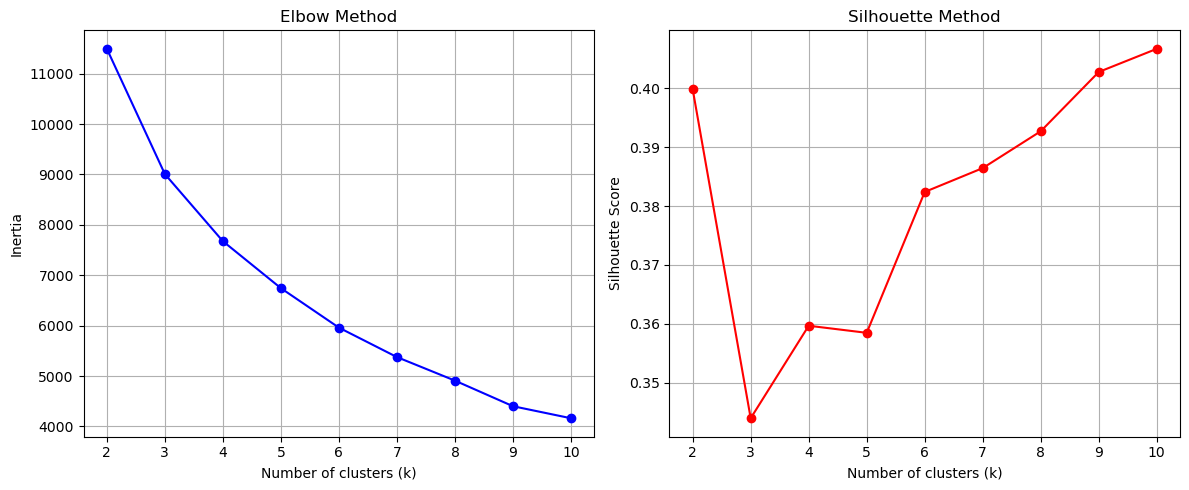


Optimal number of clusters based on silhouette score: 10


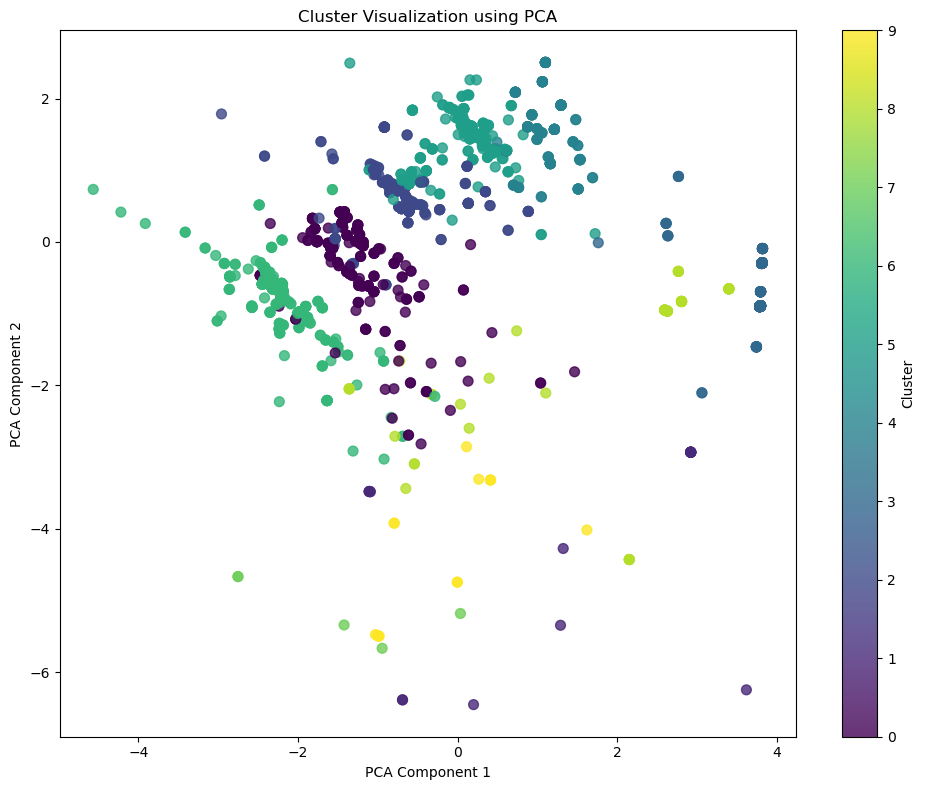


Cluster Statistics:
        Manufacturer                          5G                         4G  \
                mean median        std      mean median       std      mean   
Cluster                                                                       
0          23.413655   28.0  10.941633  0.000000    0.0  0.000000  0.983936   
1           5.350000    2.5   5.650105  0.550000    1.0  0.510418  0.450000   
2          23.220588   26.0   8.722056  0.960784    1.0  0.194585  0.093137   
3           2.379310    2.0   1.703854  1.000000    1.0  0.000000  0.008621   
4          25.281250   28.0   6.220284  1.000000    1.0  0.000000  0.093750   
5          25.421642   27.0   6.640404  1.000000    1.0  0.000000  0.208955   
6          23.397351   26.0  11.086240  0.000000    0.0  0.000000  0.986755   
7          25.600000   28.0   9.099451  0.000000    0.0  0.000000  1.000000   
8          12.600000   10.0   9.474332  0.654545    1.0  0.479899  0.290909   
9          16.000000   16.0   0

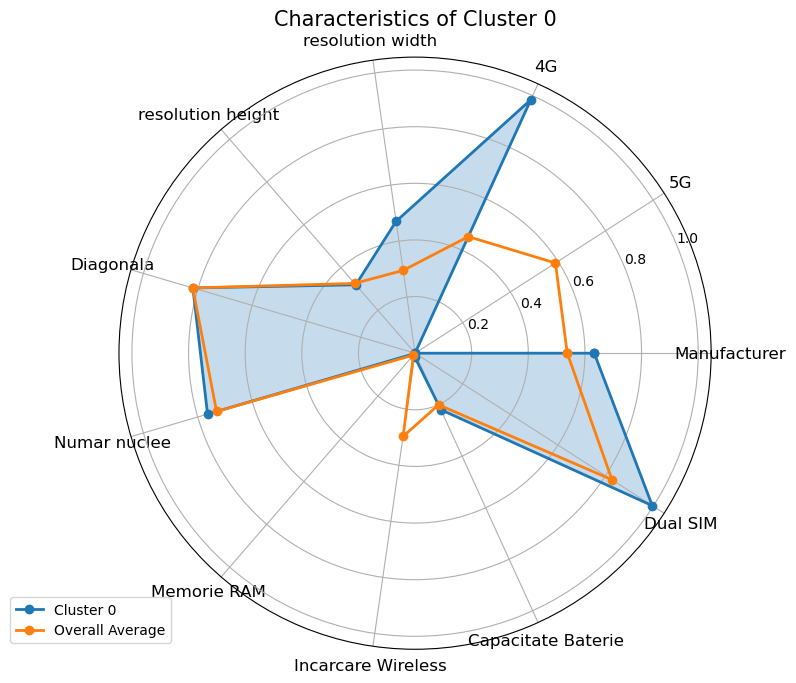

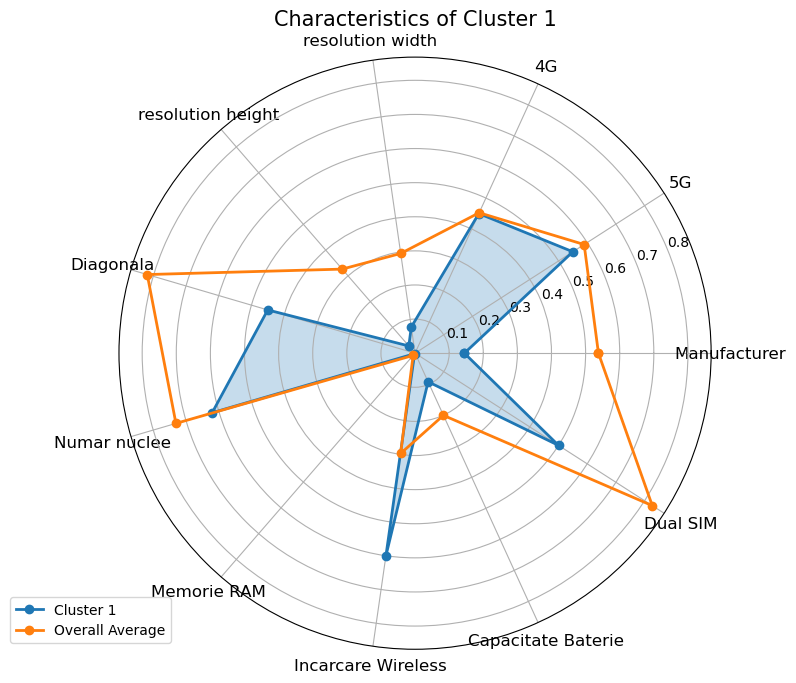

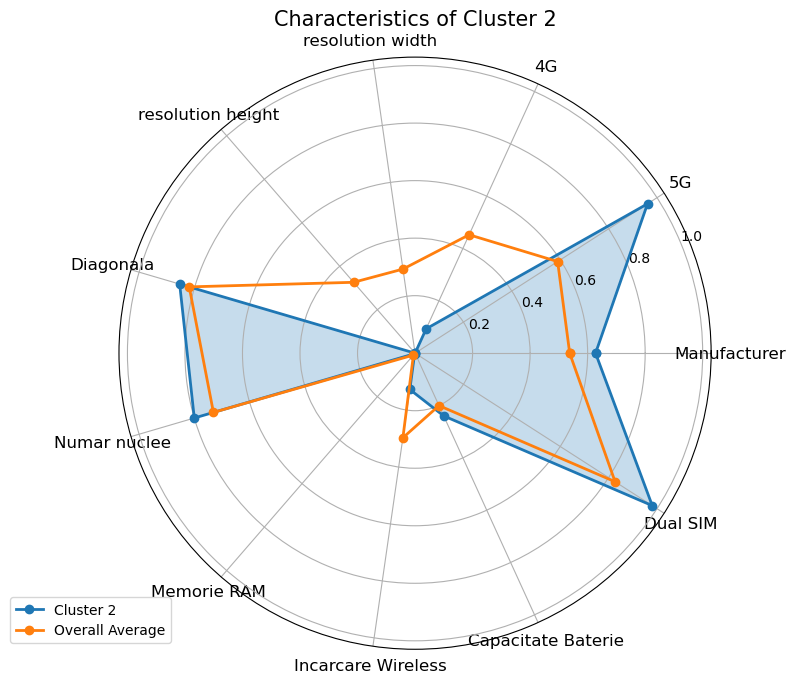

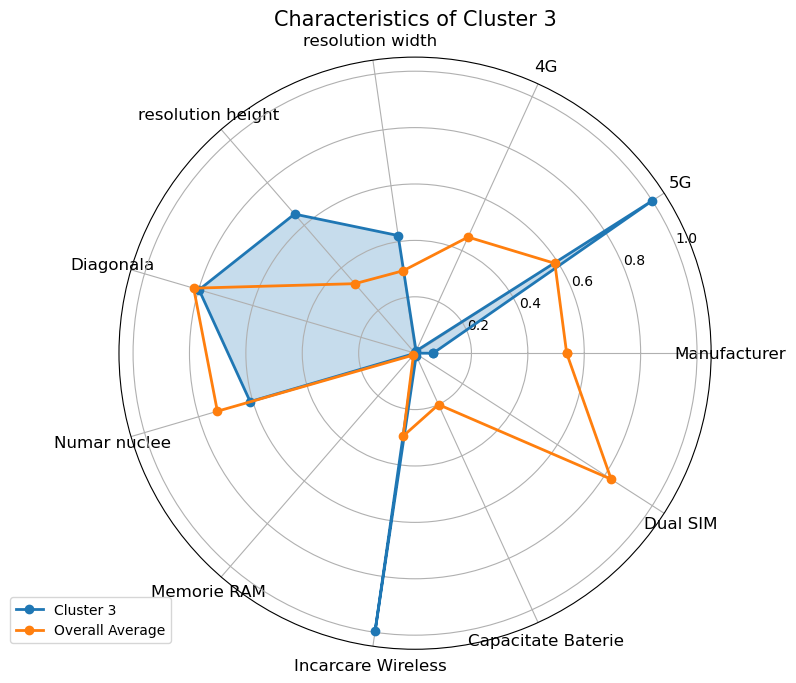

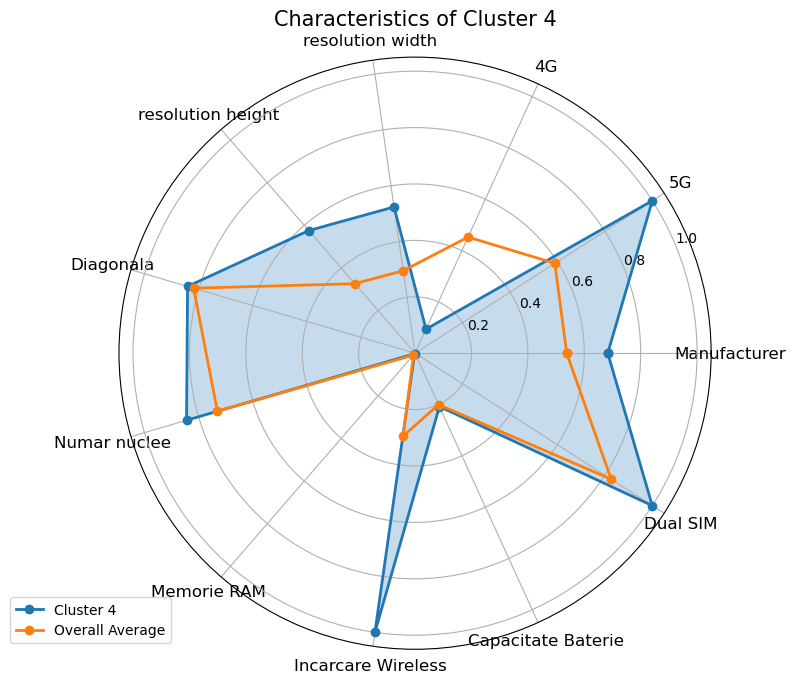

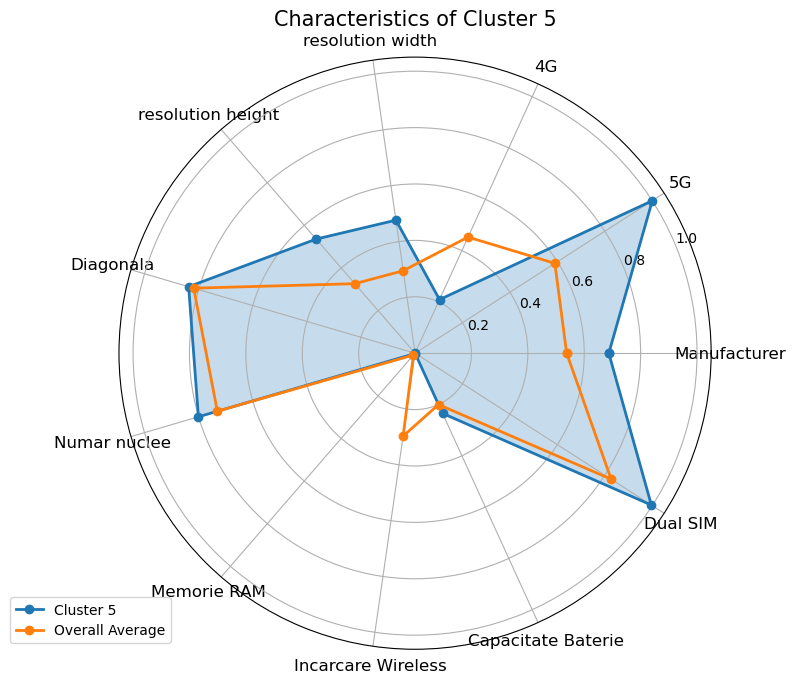

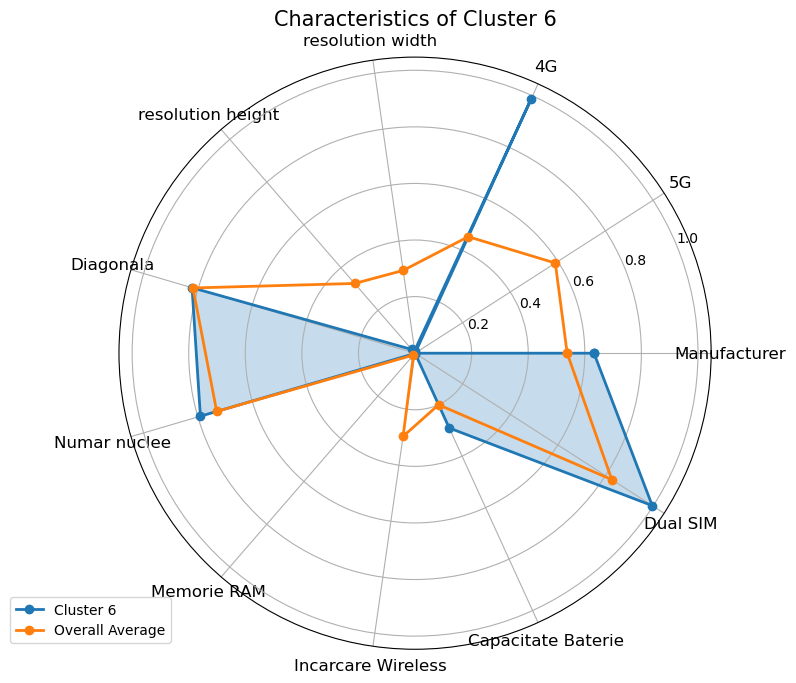

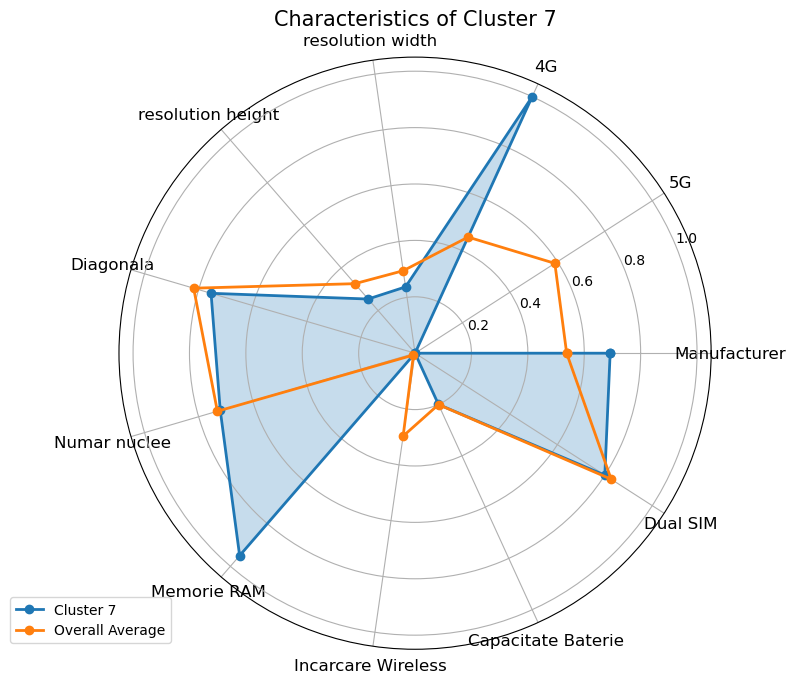

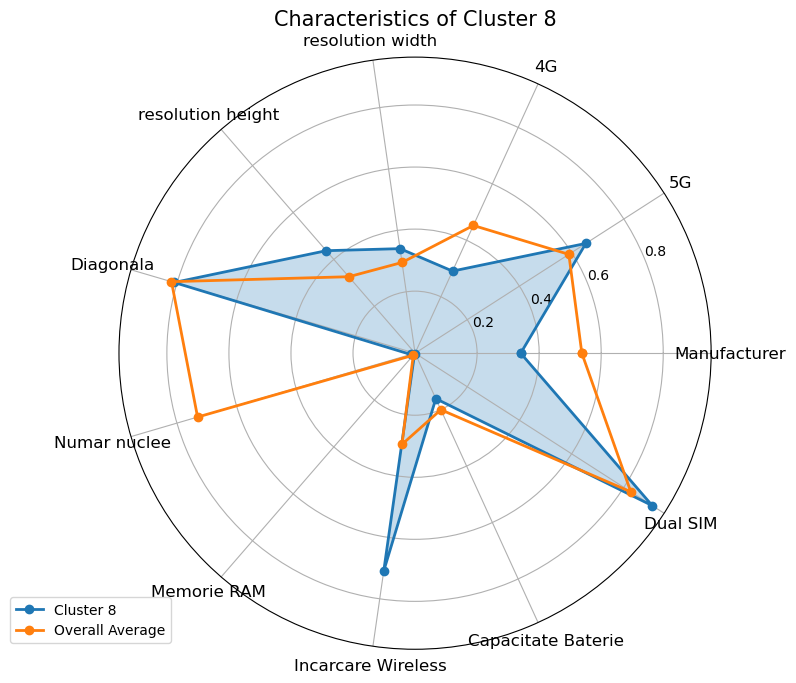

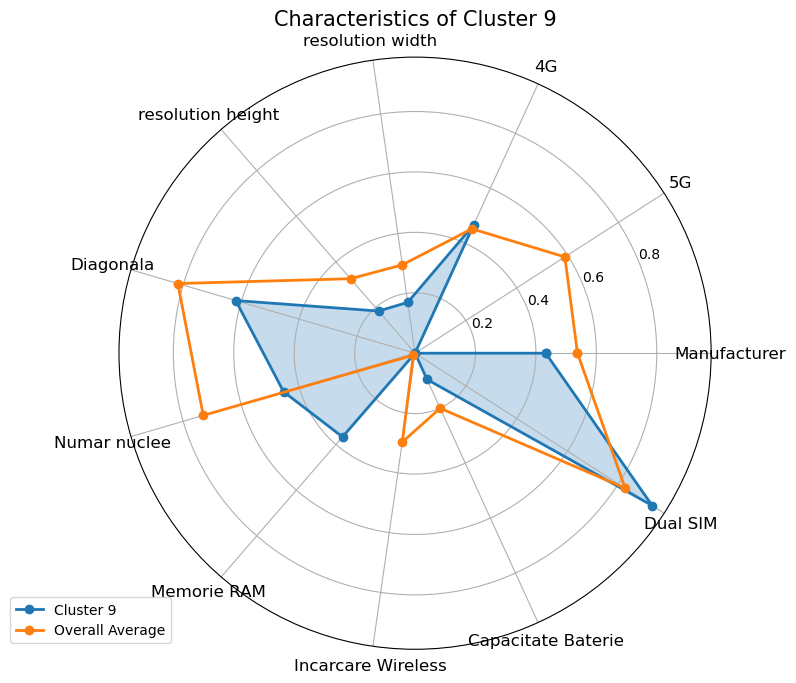


Sample of products with cluster assignments:
   Cluster  Manufacturer  5G  4G  resolution width  resolution height  \
0        0            19   0   1            1612.0              720.0   
1        3             2   1   0            1320.0             2868.0   
2        0            28   0   1            1080.0             2400.0   
3        2            34   1   0               0.0                0.0   
4        3             2   1   0            1320.0             2868.0   
5        6            34   0   1               0.0                0.0   
6        5            13   1   0            1200.0             2664.0   
7        3             2   1   0            1206.0             2622.0   
8        6            35   0   1               0.0                0.0   
9        6            34   0   1               0.0                0.0   

   Diagonala  Numar nuclee  Memorie RAM  Incarcare Wireless  \
0       6.56           8.0          4.0                   0   
1       6.90           6

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Assume df_model_training is your dataframe with all the preprocessing already done
# as shown in your code snippet

# 1. Select features for clustering
features = ['Manufacturer', '5G', '4G', 'resolution width', 'resolution height', 
            'Diagonala', 'Numar nuclee', 'Memorie RAM', 'Incarcare Wireless', 
            'Capacitate Baterie', 'Dual SIM']

# 2. Extract features for clustering
X = df_model_training[features].copy()

# 3. Standardize the data (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Determine optimal number of clusters using the Elbow method and Silhouette score
def find_optimal_clusters(X, max_k=10):
    """Find the optimal number of clusters using both Elbow method and Silhouette score."""
    inertia_values = []
    silhouette_scores = []
    k_range = range(2, max_k+1)
    
    for k in k_range:
        # K-means clustering
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X)
        
        # Inertia (for Elbow method)
        inertia_values.append(kmeans.inertia_)
        
        # Silhouette score
        sil_score = silhouette_score(X, cluster_labels)
        silhouette_scores.append(sil_score)
        
        print(f'K = {k}, Inertia = {kmeans.inertia_:.2f}, Silhouette Score = {sil_score:.3f}')
    
    # Plot the Elbow method
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertia_values, 'bo-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_scores, 'ro-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Best k based on silhouette score
    best_k_silhouette = k_range[np.argmax(silhouette_scores)]
    
    return best_k_silhouette, inertia_values, silhouette_scores

# Find optimal number of clusters
best_k, inertia_values, silhouette_scores = find_optimal_clusters(X_scaled)
print(f"\nOptimal number of clusters based on silhouette score: {best_k}")

# 5. Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_model_training['Cluster'] = kmeans.fit_predict(X_scaled)

# 6. Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_model_training['Cluster'], 
                      cmap='viridis', alpha=0.8, s=50)
plt.colorbar(scatter, label='Cluster')
plt.title('Cluster Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()

# 7. Analyze cluster characteristics
cluster_stats = df_model_training.groupby('Cluster')[features].agg(['mean', 'median', 'std'])
print("\nCluster Statistics:")
print(cluster_stats)

# 8. Analyze feature importance for each cluster
def analyze_cluster_importance(X_scaled, cluster_labels, feature_names, n_top_features=5):
    """Identify the most important features for each cluster."""
    n_clusters = len(np.unique(cluster_labels))
    centers = kmeans.cluster_centers_
    
    # Calculate the overall mean across all data
    overall_mean = np.mean(X_scaled, axis=0)
    
    # For each cluster, find features that deviate the most from the overall mean
    cluster_feature_importance = {}
    
    for i in range(n_clusters):
        # Calculate how much each feature in this cluster deviates from the overall mean
        deviation = np.abs(centers[i] - overall_mean)
        
        # Sort features by deviation
        sorted_features = np.argsort(-deviation)
        
        # Get the top N most important features
        top_features = [(feature_names[idx], deviation[idx]) for idx in sorted_features[:n_top_features]]
        
        cluster_feature_importance[i] = top_features
    
    return cluster_feature_importance

# Analyze feature importance
importance = analyze_cluster_importance(X_scaled, df_model_training['Cluster'], features)

# Print the most important features for each cluster
print("\nMost distinctive features for each cluster:")
for cluster, features_list in importance.items():
    print(f"\nCluster {cluster}:")
    for feature, score in features_list:
        print(f"  - {feature}: {score:.3f}")

# 9. Create a radar chart to visualize cluster characteristics
def radar_chart(df, features, cluster_id):
    """Create a radar chart for a specific cluster compared to overall average."""
    cluster_data = df[df['Cluster'] == cluster_id][features].mean()
    all_data = df[features].mean()
    
    # Normalize data for radar chart
    max_values = df[features].max()
    min_values = df[features].min()
    
    # Avoid division by zero
    denominator = max_values - min_values
    denominator = denominator.replace(0, 1)  # Replace zeros with ones
    
    cluster_data_norm = (cluster_data - min_values) / denominator
    all_data_norm = (all_data - min_values) / denominator
    
    # Set up the radar chart
    categories = features
    N = len(categories)
    
    # Create angles for each feature
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Convert to list for plotting
    cluster_values = cluster_data_norm.tolist()
    cluster_values += cluster_values[:1]  # Close the loop
    
    all_values = all_data_norm.tolist()
    all_values += all_values[:1]  # Close the loop
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # Draw the cluster line
    ax.plot(angles, cluster_values, 'o-', linewidth=2, label=f'Cluster {cluster_id}')
    # Draw the average line
    ax.plot(angles, all_values, 'o-', linewidth=2, label='Overall Average')
    
    # Fill area
    ax.fill(angles, cluster_values, alpha=0.25)
    
    # Set category labels
    plt.xticks(angles[:-1], categories, size=12)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    plt.title(f'Characteristics of Cluster {cluster_id}', size=15)
    plt.tight_layout()
    
    return fig

# Create radar charts for each cluster
for cluster_id in range(best_k):
    radar_chart(df_model_training, features, cluster_id)
    plt.show()

# 10. Export the results
# Add cluster labels to the original dataframe
print("\nSample of products with cluster assignments:")
print(df_model_training[['Cluster'] + features].head(10))

# Optional: Save the clustering model for future use
import joblib
joblib.dump(kmeans, 'product_clusters_model.pkl')
joblib.dump(scaler, 'product_clusters_scaler.pkl')

print("\nClustering complete. Model and scaler saved for future use.")

In [16]:
df_model_training
# Get separate dataframes for each cluster
cluster_dataframes = {}
for cluster_id in range(best_k):
    cluster_dataframes[cluster_id] = df_model_training[df_model_training['Cluster'] == cluster_id]

In [17]:
df_model_training

,5G,4G,resolution width,resolution height,Diagonala,Numar nuclee,Memorie RAM,Incarcare Wireless,Capacitate Baterie,Dual SIM,Manufacturer,price,Cluster
0,0,1,1612.0,720.0,6.56,8.0,4.0,0,5000.0,1,19,439.99,0
1,1,0,1320.0,2868.0,6.90,6.0,0.0,1,0.0,0,2,7399.99,3
2,0,1,1080.0,2400.0,6.71,8.0,4.0,0,5000.0,1,28,549.99,0
3,1,0,0.0,0.0,6.67,8.0,12.0,0,5000.0,1,34,2499.99,2
4,1,0,1320.0,2868.0,6.90,6.0,0.0,1,0.0,0,2,7499.99,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,0,1,576.0,1156.0,6.00,8.0,4.0,0,6300.0,1,25,647.99,6
1474,0,1,576.0,1156.0,6.00,8.0,4.0,0,6300.0,1,25,647.99,6
1475,0,1,576.0,1280.0,6.52,8.0,6.0,0,10600.0,1,25,1019.99,6
1476,0,1,576.0,1280.0,6.52,8.0,6.0,0,10600.0,1,25,1019.99,6


In [18]:
y = cluster_dataframes[9]['price']
cluster_dataframes[9]
df_pt_llm = cluster_dataframes[9]
df_pt_llm.drop('price', axis=1, inplace=True)
df_pt_llm.drop('Cluster', axis=1, inplace=True)
df_pt_llm

/run/user/1000/ipykernel_81040/4284662975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pt_llm.drop('price', axis=1, inplace=True)
/run/user/1000/ipykernel_81040/4284662975.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pt_llm.drop('Cluster', axis=1, inplace=True)


,5G,4G,resolution width,resolution height,Diagonala,Numar nuclee,Memorie RAM,Incarcare Wireless,Capacitate Baterie,Dual SIM,Manufacturer
1058,0,1,0.0,0.0,5.0,4.0,2048.0,0,2100.0,1,16
1065,0,1,0.0,0.0,5.0,4.0,2048.0,0,2000.0,1,16
1106,0,0,0.0,0.0,4.0,4.0,1024.0,0,1400.0,1,16
1132,0,1,1080.0,1920.0,5.0,8.0,2048.0,0,3050.0,1,16
1153,0,1,0.0,0.0,5.0,4.0,2048.0,0,2350.0,1,16
1158,0,0,1280.0,640.0,5.5,4.0,1024.0,0,3000.0,1,16
1175,0,0,0.0,0.0,4.0,4.0,1024.0,0,1400.0,1,16
1201,0,1,1080.0,1920.0,5.0,8.0,2048.0,0,3050.0,1,16
1205,0,0,720.0,1570.0,5.0,4.0,1024.0,0,2200.0,1,16
1342,0,0,720.0,1570.0,5.0,4.0,1024.0,0,2200.0,1,16


In [19]:
# Approach 1: If df_model_training and y have different lengths
# Make sure they have the same index and align them
df_model_training = df_pt_llm.loc[y.index]  # If y is a Series
# OR
y = y[df_model_training.index]  # Adjust y to match df_model_training

# Approach 2: If using the wrong dataframe for feature names
rf = RandomForestRegressor()
rf.fit(df_pt_llm, y)

# Get feature importance using the correct columns
rf_importance = pd.DataFrame({
    'Feature': df_model_training.columns,  # Use the same dataframe you used for training
    'Importance': rf.feature_importances_
})
print(rf_importance.sort_values('Importance', ascending=False))

               Feature  Importance
8   Capacitate Baterie    0.332442
2     resolution width    0.179461
1                   4G    0.114920
3    resolution height    0.109002
6          Memorie RAM    0.105034
9             Dual SIM    0.103512
5         Numar nuclee    0.032466
4            Diagonala    0.023163
0                   5G    0.000000
7   Incarcare Wireless    0.000000
10        Manufacturer    0.000000


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# For regression models
predictions = rf.predict(df_model_training)
print(f"R² Score: {r2_score(y, predictions)}")
print(f"Mean Squared Error: {mean_squared_error(y, predictions)}")
print(f"Root Mean Squared Error: {mean_squared_error(y, predictions, squared=False)}")
print(f"Mean Absolute Error: {mean_absolute_error(y, predictions)}")

# Cross-validation (more robust evaluation)
cv_scores = cross_val_score(rf, df_model_training, y, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R² score: {cv_scores.mean()}")

R² Score: 0.891512887977786
Mean Squared Error: 5156.731878535224
Root Mean Squared Error: 71.81038837476945
Mean Absolute Error: 50.05626984126997


/nix/store/1d6cjhp004crgy316ycwh2dlk25c72p0-python3.12-scikit-learn-1.5.0/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Cross-validation R² scores: [ 0.80505871 -0.1454571   0.70952485 -0.67104645  0.84753744]
Mean CV R² score: 0.30912348839689335
